Importing Libraries

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the dataset

In [138]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
meal_info = pd.read_csv("meal_info.csv")
center_info = pd.read_csv("fulfilment_center_info.csv")

Exploratory data analysis

In [139]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [140]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [142]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [143]:
train['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

Checking for null values

In [144]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

Reading and merging.csv files

In [145]:

trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")
trainfinal = pd.merge(trainfinal,center_info, on="center_id", how="outer")
trainfinal.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [146]:
trainfinal = trainfinal.drop(['center_id', 'meal_id'], axis=1)
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1436842,1,181.39,181.39,0,0,865,Beverages,Italian,590,56,TYPE_B,6.3
1,1205013,2,183.36,182.36,0,0,782,Beverages,Italian,590,56,TYPE_B,6.3
2,1447751,3,184.36,182.36,0,0,851,Beverages,Italian,590,56,TYPE_B,6.3
3,1014968,4,182.36,183.36,0,0,1202,Beverages,Italian,590,56,TYPE_B,6.3
4,1003563,5,183.39,181.39,0,0,958,Beverages,Italian,590,56,TYPE_B,6.3


Dropping columns

In [147]:
cols = trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [148]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7] 
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [149]:
trainfinal = trainfinal[cols]
trainfinal.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [150]:
#sns.regplot(x=trainfinal['cuisine'],y=trainfinal['num_orders'])

<Axes: xlabel='num_orders', ylabel='week'>

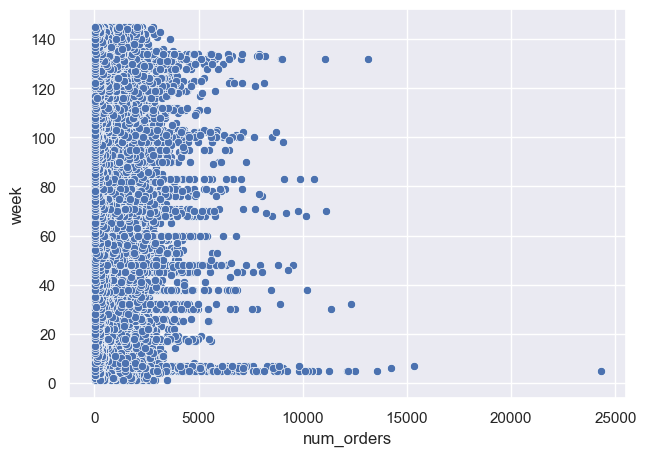

In [151]:
#sns.pairplot(data=trainfinal[trainfinal.columns])
sns.scatterplot(x=trainfinal['num_orders'],y=trainfinal['week'])

In [152]:
from sklearn.preprocessing import LabelEncoder


Label encoding

In [153]:
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1436842,1,590,56,TYPE_B,6.3,Beverages,Italian,181.39,181.39,0,0,865
1,1205013,2,590,56,TYPE_B,6.3,Beverages,Italian,183.36,182.36,0,0,782
2,1447751,3,590,56,TYPE_B,6.3,Beverages,Italian,184.36,182.36,0,0,851
3,1014968,4,590,56,TYPE_B,6.3,Beverages,Italian,182.36,183.36,0,0,1202
4,1003563,5,590,56,TYPE_B,6.3,Beverages,Italian,183.39,181.39,0,0,958


In [154]:
trainfinal.shape

(456548, 13)

data visualization

Text(0.5, 1.0, 'num_orders Distribution')

<Figure size 1200x700 with 0 Axes>

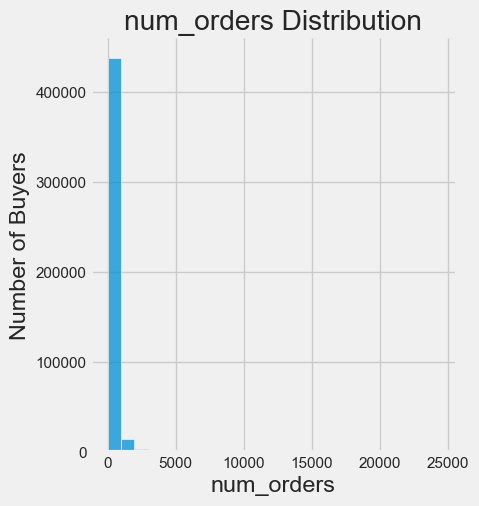

In [155]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.displot(trainfinal.num_orders, bins = 25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

In [156]:
trainfinal2 = trainfinal.drop(['id'], axis=1)
# Loop through the columns
for col in trainfinal2.columns:
    if trainfinal2[col].dtype == 'object':
        # Create a LabelEncoder object
        le = LabelEncoder()
        # Fit and transform the data
        trainfinal2[col] = le.fit_transform(trainfinal2[col])
correlation = trainfinal2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

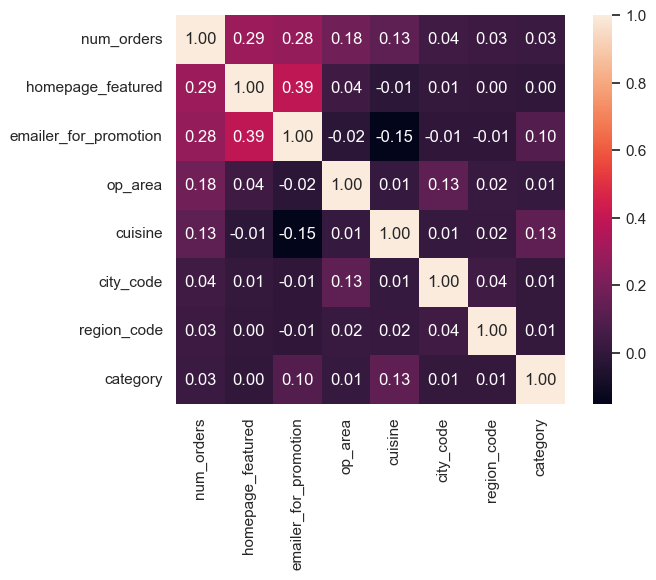

In [157]:
correlation_map = np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale=1.0) 
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

spliting the dataset into dependent and independent variable

In [158]:
features = columns.drop(['num_orders'])
trainfinal3 = trainfinal[features]
X = trainfinal3.values
Y = trainfinal['num_orders'].values
trainfinal3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,6.3,Italian,590,56,Beverages
1,0,0,6.3,Italian,590,56,Beverages
2,0,0,6.3,Italian,590,56,Beverages
3,0,0,6.3,Italian,590,56,Beverages
4,0,0,6.3,Italian,590,56,Beverages


Split the dataset into train set and test set

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25)

Train and test model algorithms

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
X_train

array([[0, 0, 4.0, ..., 576, 34, 'Sandwich'],
       [0, 1, 4.2, ..., 615, 34, 'Desert'],
       [0, 0, 3.7, ..., 679, 56, 'Desert'],
       ...,
       [0, 0, 3.9, ..., 522, 56, 'Beverages'],
       [0, 0, 3.9, ..., 522, 56, 'Soup'],
       [0, 0, 4.0, ..., 522, 56, 'Salad']],
      shape=(342411, 7), dtype=object)

Model Evalution

In [161]:
# Convert categorical variables to numeric
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid modifying the original X arrays
X_train_encoded = X_train.copy()
X_val_encoded = X_val.copy()

# Find categorical columns (string type)
for i in range(X_train.shape[1]):
	if isinstance(X_train[0, i], str):
		le = LabelEncoder()
		# Fit on both train and val to ensure consistent encoding
		all_values = np.concatenate([X_train[:, i], X_val[:, i]])
		le.fit(all_values)
		X_train_encoded[:, i] = le.transform(X_train[:, i])
		X_val_encoded[:, i] = le.transform(X_val[:, i])

# Now fit XGBRegressor with numeric data
XG = XGBRegressor()
XG.fit(X_train_encoded, Y_train)
y_pred = XG.predict(X_val_encoded)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 72.60316119234382


In [162]:
# Convert categorical variables to numeric for LinearRegression
X_train_lr = X_train_encoded.copy()  # Use the encoded arrays from cell 37
X_val_lr = X_val_encoded.copy()

# Convert any remaining object dtypes to float
X_train_lr = X_train_lr.astype(float)
X_val_lr = X_val_lr.astype(float)

LR = LinearRegression()
LR.fit(X_train_lr, Y_train)
y_pred = LR.predict(X_val_lr)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 129.8083479960431


In [163]:
L = Lasso()
L.fit(X_train_encoded, Y_train)
y_pred = L.predict(X_val_encoded)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 129.4388248626716


In [164]:
EN = ElasticNet()
EN.fit(X_train_encoded, Y_train)
y_pred = EN.predict(X_val_encoded)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 131.5695347288437


In [165]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train_encoded, Y_train)
y_pred = DT.predict(X_val_encoded)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 62.96936526577481


In [166]:
KNN = KNeighborsRegressor()
KNN.fit(X_train_encoded, Y_train)
y_pred = KNN.predict(X_val_encoded)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 66.65824898535898


In [167]:
GB = GradientBoostingRegressor()
GB.fit(X_train_encoded, Y_train)
y_pred = GB.predict(X_val_encoded)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 98.87661386188356


Save the model

In [168]:
import pickle
pickle.dump(DT,open('fdemand.pkl','wb'))